In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from general import rgb2gray
from general import alpha2rgb
from segmentacion.otsu import thresholdOtsu
from formas_binarias import detectar_bordes_binarios

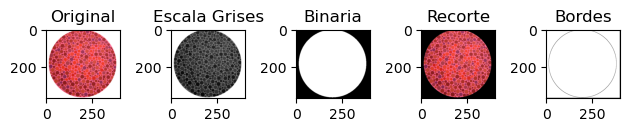

In [41]:
image = alpha2rgb('imagenesPruebas/circle.png')
imgGray = rgb2gray(image)
binary = thresholdOtsu(imgGray)
masked = np.zeros_like(image)
bordes_detectados = detectar_bordes_binarios(binary, 3)
for i in range(image.shape[1]):
    for j in range(image.shape[0]):
        if binary[j, i] == 0:
            masked[j, i, :] = image[j, i, :]
fig, axs = plt.subplots(1, 5)
axs[0].imshow(image)
axs[0].set_title("Original")
axs[1].imshow(imgGray, cmap='gray')
axs[1].set_title("Escala Grises")
axs[2].imshow(binary, cmap='binary')
axs[2].set_title("Binaria")
axs[3].imshow(masked)
axs[3].set_title("Recorte")
axs[4].imshow(bordes_detectados, 'binary')
axs[4].set_title("Bordes")
fig.tight_layout()

In [42]:
borderless_image = bordes_detectados[1:bordes_detectados.shape[0]-1, 1:bordes_detectados.shape[1]-1]

In [43]:
def bettle(inicio, contorno):
    visited = np.zeros_like(contorno)
    contour_list = [inicio]
    xi = inicio[1]
    yi = inicio[0]
    visited[yi, xi] = 1
    initial = contorno[yi, xi]

    while True:
        direction_found = False
        for direction in range(1, 9):
            x_next = xi + (direction % 3) - 1
            y_next = yi + (direction // 3) - 1

            if 0 <= x_next < contorno.shape[1] and 0 <= y_next < contorno.shape[0]:
                if contorno[y_next, x_next] == initial and visited[y_next, x_next] == 0:
                    contour_list.append((y_next, x_next))
                    visited[y_next, x_next] = 1
                    xi = x_next
                    yi = y_next
                    direction_found = True
                    break
        if not direction_found or contour_list[-1] == inicio:
            break
    return contour_list

def primer0(contorno):
    for i in range(contorno.shape[1]):
        for j in range(contorno.shape[0]):
            if contorno[j, i] == 1:
                return (j, i)

In [44]:
print(primer0(borderless_image))
liscontorno = bettle(primer0(borderless_image), borderless_image)
print(liscontorno)

(171, 13)
[(171, 13), (170, 14), (169, 14), (168, 14), (167, 14), (166, 14), (165, 14), (164, 14), (163, 14), (162, 14), (161, 14), (160, 14), (159, 14), (158, 15), (157, 15), (156, 15), (155, 15), (154, 15), (153, 16), (152, 16), (151, 16), (150, 16), (149, 16), (148, 16), (147, 17), (146, 17), (145, 17), (144, 17), (143, 17), (142, 18), (141, 18), (140, 18), (139, 18), (138, 19), (137, 19), (136, 19), (135, 19), (134, 20), (133, 20), (132, 20), (131, 20), (130, 21), (129, 21), (128, 22), (127, 22), (126, 22), (125, 23), (124, 23), (123, 23), (122, 23), (121, 24), (120, 24), (119, 24), (118, 25), (117, 25), (116, 26), (115, 26), (114, 26), (113, 27), (112, 27), (111, 28), (110, 28), (109, 29), (108, 29), (107, 29), (106, 30), (105, 30), (104, 31), (103, 31), (102, 32), (101, 33), (100, 33), (99, 33), (98, 34), (97, 34), (96, 35), (95, 35), (94, 36), (93, 37), (92, 37), (91, 38), (90, 38), (89, 39), (88, 40), (87, 40), (86, 41), (85, 42), (84, 42), (83, 43), (82, 43), (81, 44), (80, 45